In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
# Add another file
MTA_Fare = np.load('MTA_Fare.npy')
MTA_Fare.astype(float)
MTA = np.ndarray.flatten(MTA_Fare)
MTA = MTA.astype(float)
MTA[MTA==-1] = NaN
MTA = np.reshape(MTA,(600, 23, 194))
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [268]:
# 194 weeks from 05/21/2010 to 02/21/2014
date = pd.date_range(start='20100521',end='20140221',freq='1W-FRI')[0:194]

In [284]:
print (MTA.shape)
#or for all stations
mta_stations = np.transpose(np.nansum(MTA, axis=0))
print (mta_stations.shape)
mta_stations = pd.DataFrame(mta_stations,index=date,columns=ridetype).dropna()
#or for all ride types
mta_rides = np.transpose(np.nansum(MTA, axis=1))
print (mta_rides.shape)
mta_rides = pd.DataFrame(mta_rides,index=date).dropna()
len(mta_rides)

(600L, 23L, 194L)
(194L, 23L)
(194L, 600L)


194

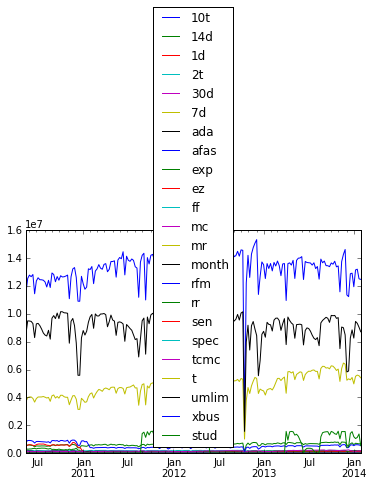

In [285]:
mta_stations.plot()

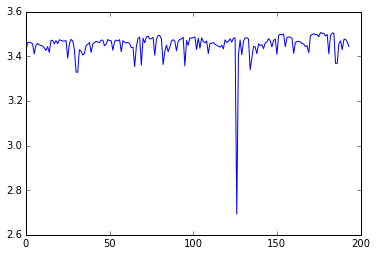

In [286]:
mta_mean = np.nanmean(np.nanmean(MTA,axis=1),axis=0)
plot(log10(mta_mean))

#plot(log(np.nanmean(MTA_Fare,axis=1)))

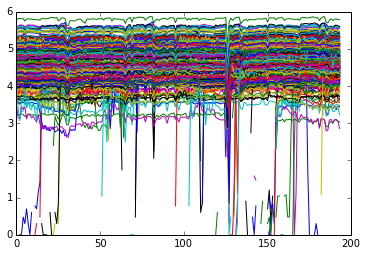

In [287]:
plot(log10(mta_rides))

##Task 1: 
###Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. Identify it and figure out what it is due to.

In [153]:
# Make barplot of means for each type of subscription
#barplot(ridetype,np.nanmean(MTA,axis=0))
MTA.shape

(600L, 23L, 194L)

In [228]:
# Do it for the aggregated time series
thresholds = [np.nanmean(mta_mean) - 3*np.nanstd(mta_mean),
 np.nanmean(mta_mean) + 3*np.nanstd(mta_mean)]
thresholds
#mta_mean[((mta_mean<thresholds[0]) | (mta_mean>thresholds[1]))]
np.where((mta_mean<thresholds[0]) | (mta_mean>thresholds[1]))

(array([126], dtype=int64),)

In [ ]:
mta_sta_norm=mta_stations
for col in mta_stations:
    mta_sta_norm[col] = (mta_stations[col] - np.nanmean(mta_stations[col]))/np.nanstd(mta_stations[col])

In [ ]:
mta_sta_norm=mta_stations
for col in mta_stations:
    mta_sta_norm[col] = (mta_stations[col] - np.nanmean(mta_stations[col]))/np.nanstd(mta_stations[col])

In [318]:
mta_rides_norm=mta_rides
for col in mta_rides:
    mta_rides_norm[col] = (mta_rides[col] - np.nanmean(mta_rides[col]))/np.nanstd(mta_rides[col])

In [322]:
np.where((mta_rides_norm<-3) | (mta_rides_norm > 3) )[0]

array([  0,   0,   4,   5,   5,   5,   5,   5,  13,  13,  14,  14,  15,
        16,  16,  17,  17,  17,  18,  18,  20,  23,  24,  27,  29,  29,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  31,  31,
        31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,
        31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,
        31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,  31,
        31,  31,  31,  31,  31,  31,  31,  31,  31,  32,  34,  38,  43,
        47,  49,  49,  49,  51,  52,  53,  53,  54,  55,  57,  58,  59,
        59,  61,  64,  64,  64,  65,  65,  65,  65,  65,  66,  66,  67,
        67,  67,  68,  68,  69,  69,  69,  70,  70,  72,  72,  72,  72,
        73,  73,  80,  80,  81,  81,  81,  82,  82,  95,  97,  9

###This is 126 weeks after 05/21/2010, 22 weeks after 05/21/2012, which hits on the week of 10/15/2012

#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

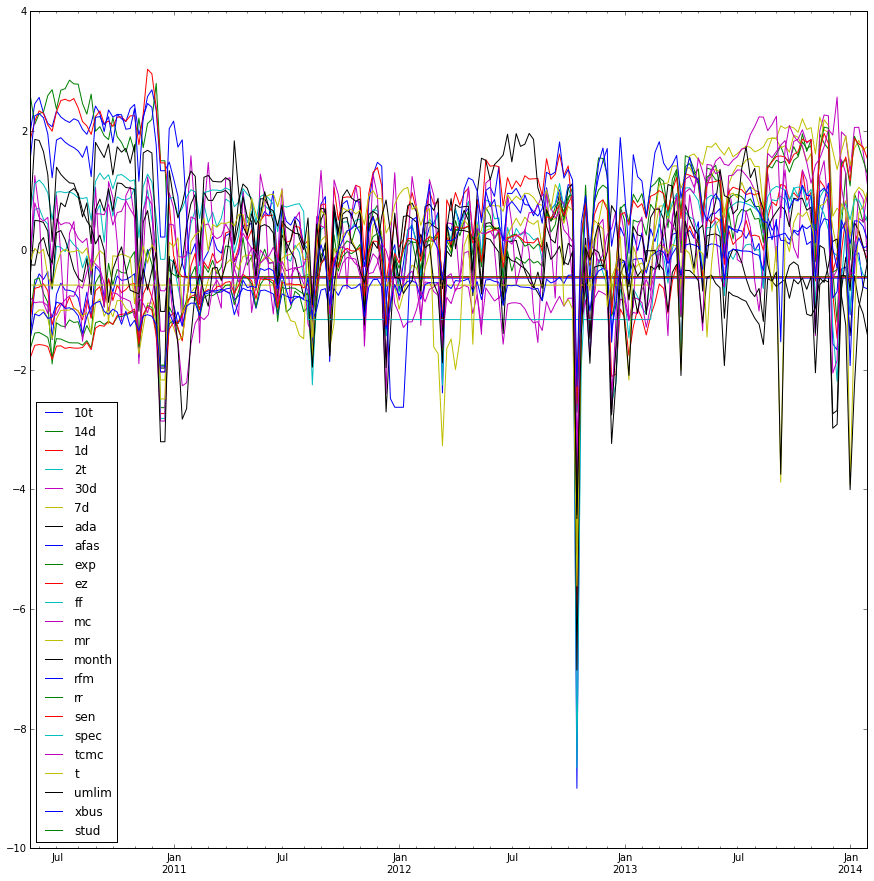

In [323]:
mta_sta_norm.plot(figsize=(15,15))

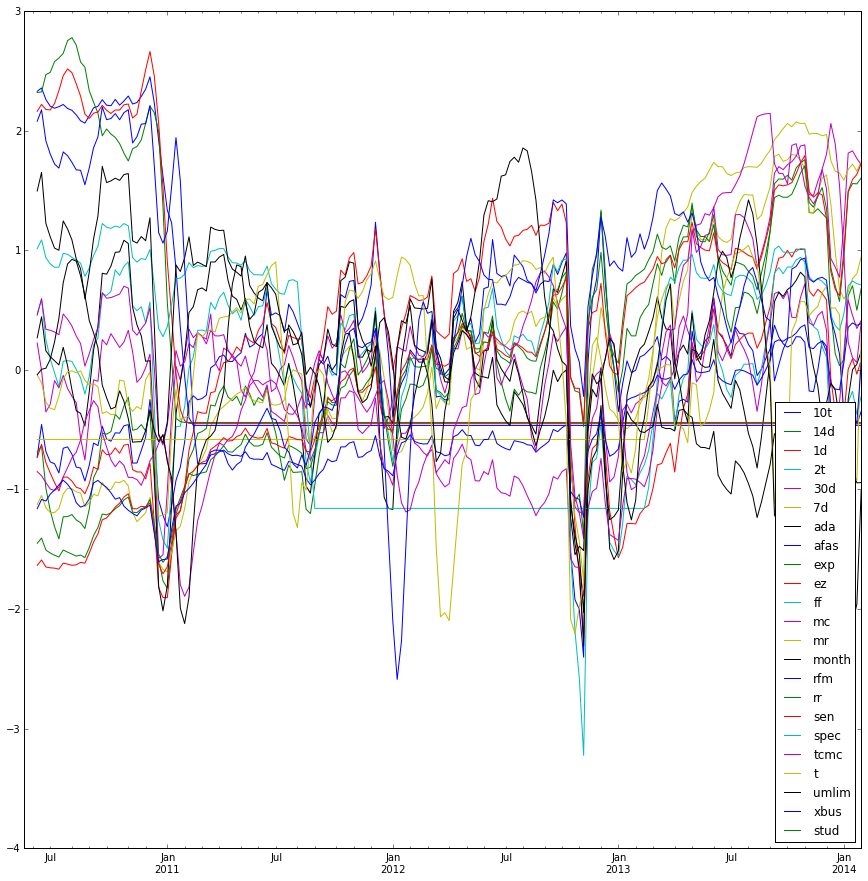

In [313]:
pd.rolling_mean((mta_sta_norm),4.2).plot(figsize=(15,15))

# TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


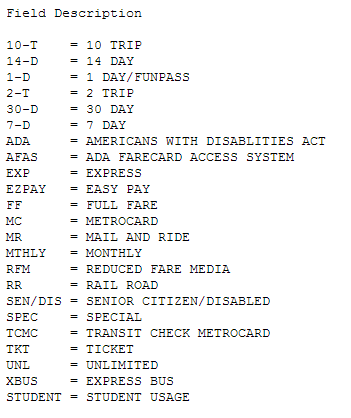

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function: np.fft.rfft
np.fft.rfft(mydata)
will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function
np.fft.rfftfreq(N, d)
which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

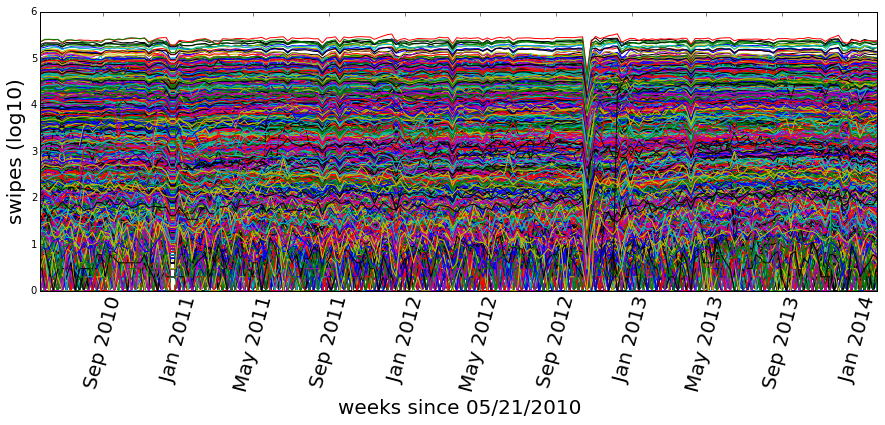

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)
mta_allsum = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


##NOTE ON THE TREND DETECTION:
###you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

###to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

###you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

###notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


###below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


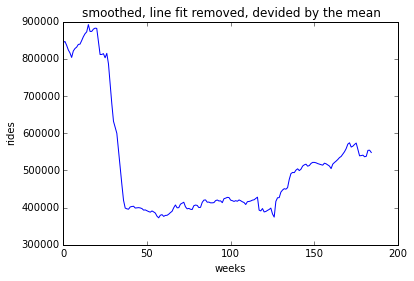

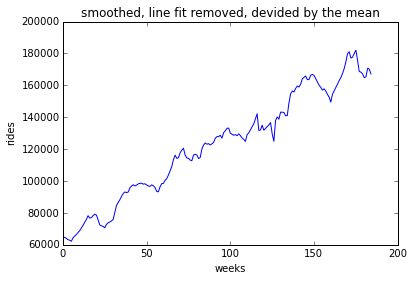

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

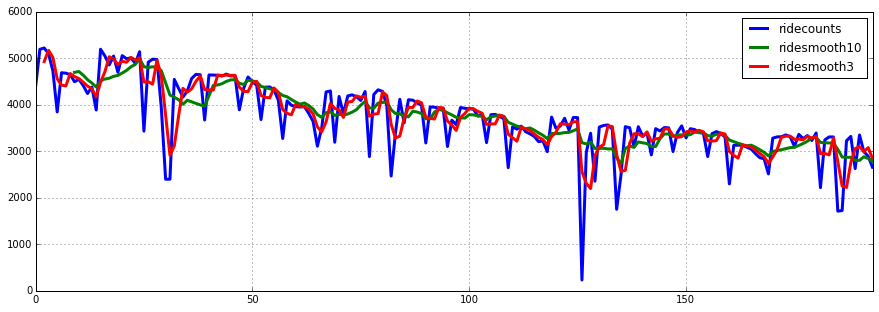

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

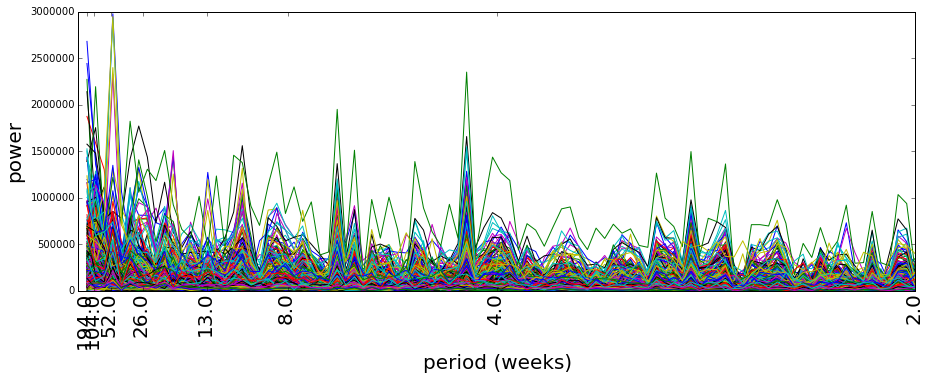

In [51]:
#this is a "power spectrum": the plot of the absolute value of the fourier transform. 
#I changed the xtick labels from frequecy (1/week) to period (in weeks)
#to facilitate the visual identification of the 1-year period peak
#(notice however that np.fft.rfftfreq(N, d)  returns frequency)

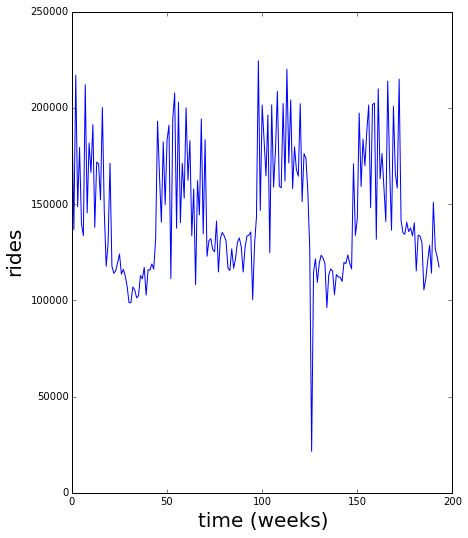

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space